# Titanic - Data Cleaning and Analysis

### Project Objective
- Load, inspect, and understand a real-world dataset. 
- Identify and handle missing values and inconsistencies. 
- Perform basic data cleaning and feature engineering. 
- Conduct exploratory data analysis (EDA) with visualizations. 
- Build a simple model to demonstrate how the cleaned data can be used for prediction

#### import Libraries

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
custom_palette = {'male': '#4E79A7', 'female': '#FF6B6B'} 

#### Loading the dataset

In [3]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.shape

(891, 12)

- Statistical summary

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Datatype info

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Exploratory Data Analysis

- categorical attributes

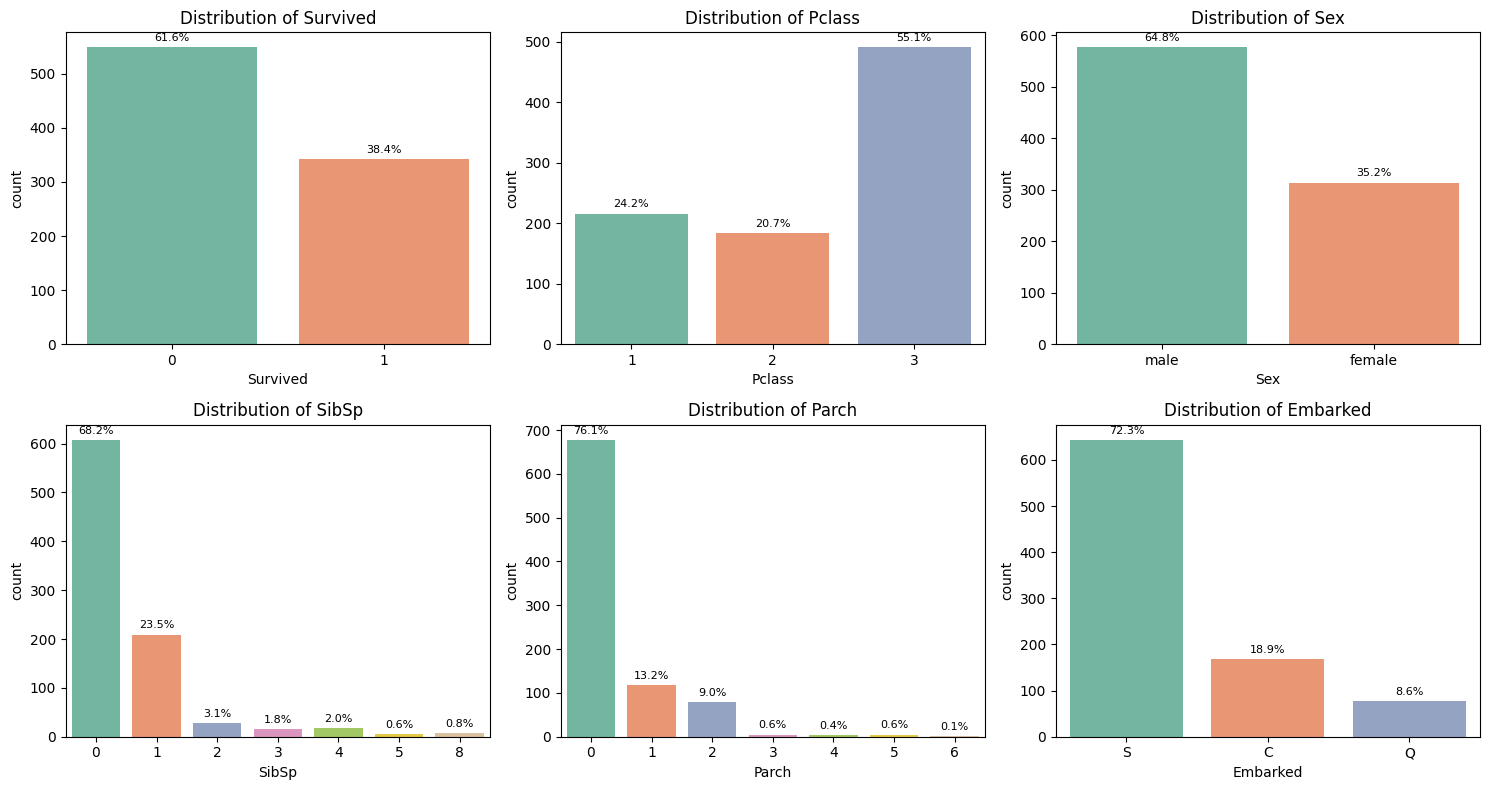

In [26]:
categories = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))  
axes = axes.flatten()

total = len(train_df)

for i, category in enumerate(categories):
    ax = sns.countplot(data=train_df, x=category, hue=category, palette='Set2', dodge=False, legend=False, ax=axes[i])
    ax.set_title(f"Distribution of {category}")
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = 100 * height / total
            ax.annotate(f'{percentage:.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black',
                        xytext=(0, 3), textcoords='offset points')

# fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- Numerical attributes

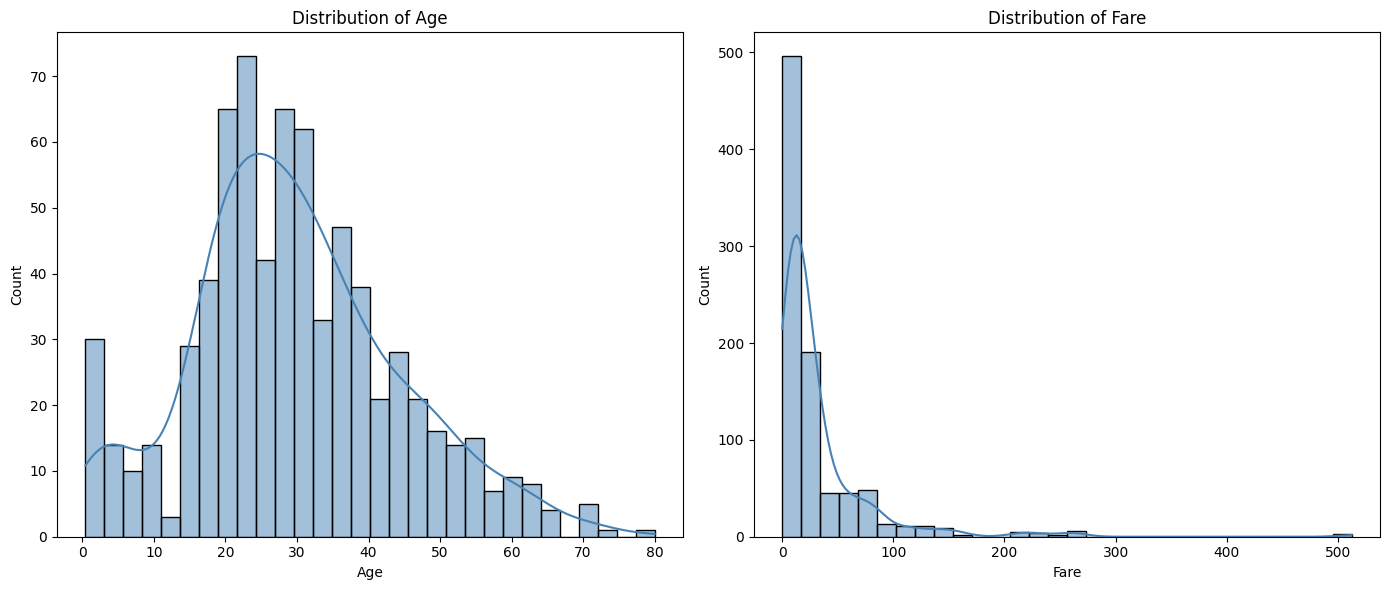

In [10]:
numerical = ["Age", "Fare"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
total = len(train_df)

for i, num in enumerate(numerical):
    ax = sns.histplot(train_df[num], kde=True, bins=30, color="steelblue", ax=axes[i])
    ax.set_title(f"Distribution of {num}")

plt.tight_layout()
plt.show()

- Average Fare by passenger class

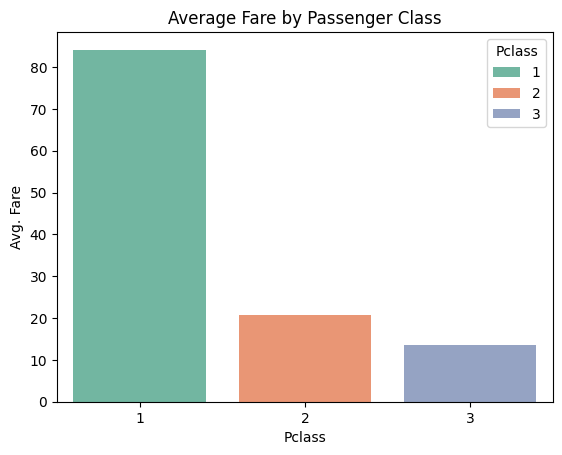

In [15]:

sns.barplot(data=train_df, x='Pclass', y='Fare', estimator='mean', hue='Pclass', errorbar=None, palette="Set2")

plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.title('Average Fare by Passenger Class')
plt.xticks(rotation=0)
plt.show()

- Total fare by passenger class

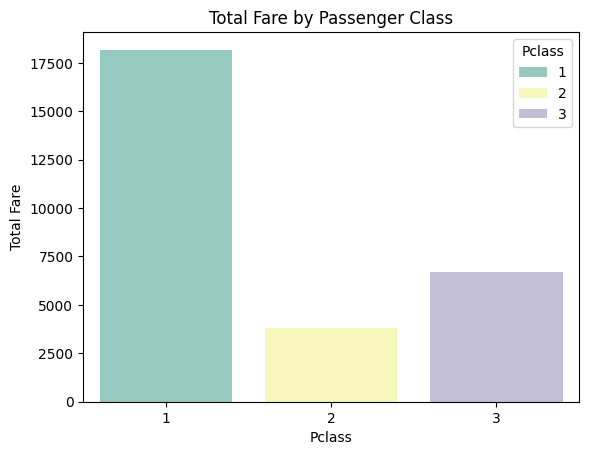

In [19]:
sns.barplot(data=train_df, x='Pclass', y='Fare', hue='Pclass', estimator=np.sum, errorbar=None, palette="Set3")

plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.title('Total Fare by Passenger Class')
plt.xticks(rotation=0)
plt.show()

- Total Fare in each class by the Survived

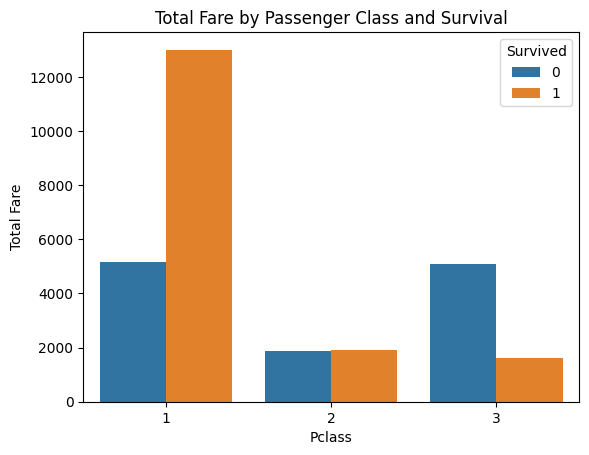

In [22]:
class_survived_fare = train_df.groupby(['Pclass', 'Survived'])['Fare'].sum().reset_index()

sns.barplot(data=class_survived_fare, x='Pclass', y='Fare', hue='Survived')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.title('Total Fare by Passenger Class and Survival')
plt.xticks(rotation=0)
plt.show()


#### Data Preprocessing

In [27]:
train_len = len(train_df)
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#### Data Cleaning

- Missing Values

In [29]:
missing_data = []
for column_name, null_rows in train_df.isnull().sum().items():
    if null_rows > 0:
        perc = null_rows / len(train_df) * 100
        missing_data.append([column_name, null_rows, perc])

missing_df = pd.DataFrame(missing_data, columns=["Column", "Missing Values", "Percentage"])

missing_df

,Column,Missing Values,Percentage
0,Age,177,19.865320
1,Cabin,687,77.104377
2,Embarked,2,0.224467


- Handling missing values with mean for Age (numeric) and mode for Embarked (categorical)

In [ ]:
df = df.fillna(value = {"Age": df["Age"].mean(), "Fare": df["Fare"].mean(), "Embarked": df["Embarked"].mode()[0]})

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

- Drop column Cabin

In [32]:
df = df.drop(columns=['Cabin'], axis=1)

In [33]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

- Duplicates

In [523]:
print(f'Number of duplicated rows: {train_df.duplicated().sum(axis=0)}')

Number of duplicated rows: 0


In [37]:
print(sns.__version__)

0.13.2


#### Log transformation for uniform data distribution

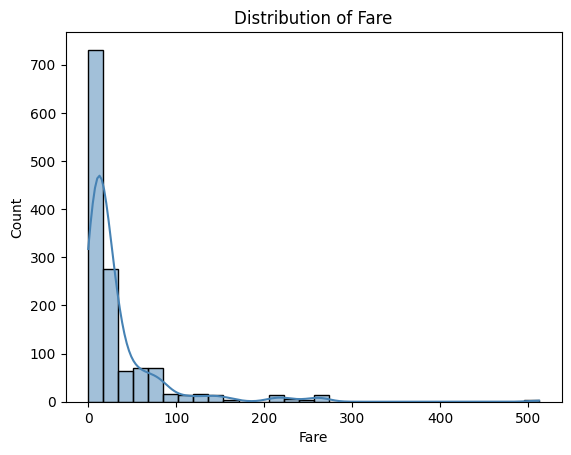

In [34]:

sns.histplot(df['Fare'], bins=30, kde=True, color='steelblue')

plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

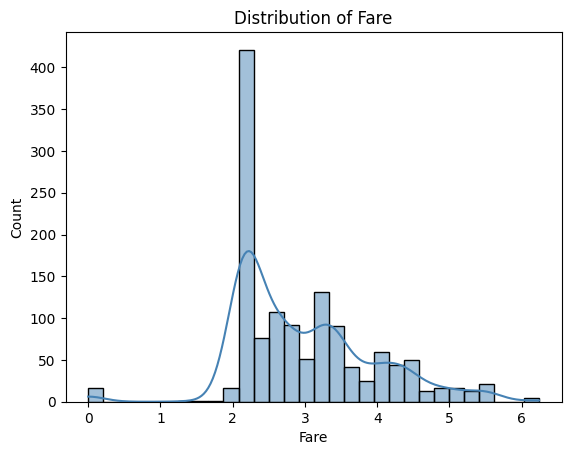

In [35]:
df['Fare'] = np.log(df['Fare']+1)
sns.histplot(df['Fare'], bins=30, kde=True, color='steelblue')

plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

- Correlation Matrix

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


- drop unnecessary columns


In [44]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


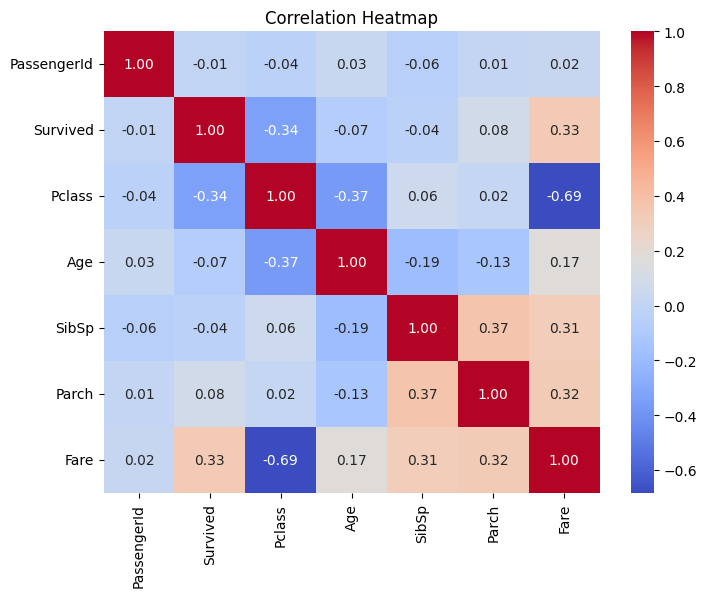

In [46]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Label Encoding


In [47]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


#### Train-Test Split

In [48]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [50]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


- input split

In [51]:
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [55]:
display(X.head(), "y",y)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


'y'

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

#### Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(X)

#### Model Training

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def classify(model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_test_pred)

    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

    print(f"Classification Report:\n {classification_report(y_test, y_test_pred)}")

    print(f"Confustion matrix:\n {cm}")
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Test Accuracy: 0.7937219730941704
Train Accuracy: 0.781437125748503
CV Score: 0.7800451949030194
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       134
         1.0       0.71      0.82      0.76        89

    accuracy                           0.79       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.80      0.79      0.80       223

Confustion matrix:
 [[104  30]
 [ 16  73]]


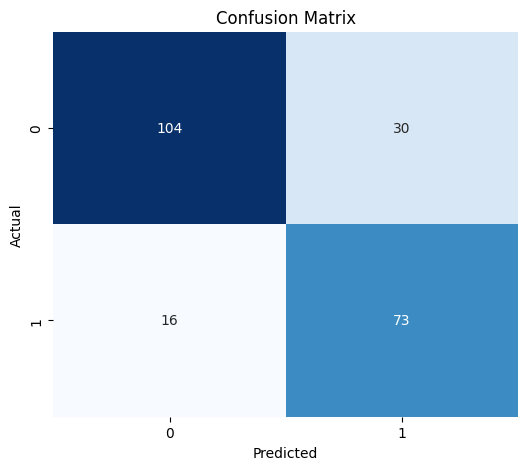

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced',)
classify(model)

Test Accuracy: 0.7309417040358744
Train Accuracy: 0.9820359281437125
CV Score: 0.7677233067604043
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.77       134
         1.0       0.64      0.73      0.68        89

    accuracy                           0.73       223
   macro avg       0.72      0.73      0.72       223
weighted avg       0.74      0.73      0.73       223

Confustion matrix:
 [[98 36]
 [24 65]]


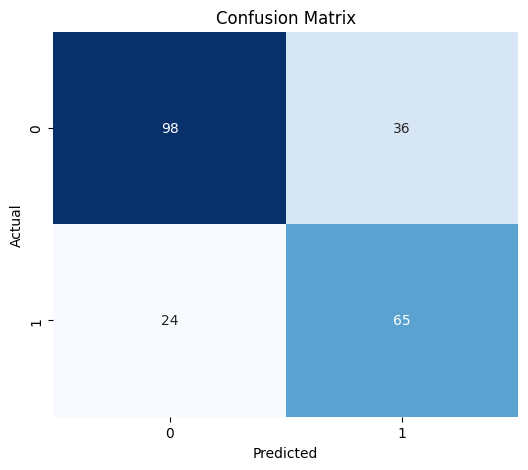

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion='entropy',
    max_depth=5,               
    min_samples_split=20,     
    min_samples_leaf=15, 
    class_weight='balanced')
classify(model)

#### Compare Models

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=10, random_state=42),
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.793722,0.708738,0.820225,0.760417
1,Decision Tree,0.771300,0.827586,0.539326,0.653061


In [ ]:
# Survival Rate Plot

def visualize_survival_rate(plot_df, attr, ax, order=None, xticks=None, title=None, palette=custom_palette):
    survived_df = plot_df[plot_df['Survived'] == 1]    
    survival_stats =pd.concat([
        survived_df[attr].value_counts(),
        survived_df[attr].value_counts(normalize=True).mul(100).round(2)
        ], axis=1, keys=["Total", "Percentage"]).reset_index()

    # plt.figure(figsize=(6, 5))
    sns.barplot(x=attr, y='Total', data=survival_stats, palette=palette, order=order, ax=ax)

    for bar, total, perc in zip(ax.patches, survival_stats['Total'], survival_stats['Percentage']):
        ax.text(
            x = bar.get_x() + bar.get_width() / 2,
            y = bar.get_height() + 1,
            s = f"{total} ({perc}%)",
            ha='center',
            va='bottom'
        )

    ax.set_title(title)
    ax.set_ylabel("Number of Survivors")
    ax.set_xlabel(attr)
    if xticks is not None:
        positions, labels = xticks
        ax.set_xticks(positions)
        ax.set_xticklabels(labels)

    ax.set_ylim(0, survival_stats['Total'].max() * 1.15)

In [ ]:
# Visualization
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()

# Survival by Gender
visualize_survival_rate(df, attr="Sex", ax=axes[0], title="Survival Rate by Gender")

# Survival by Ticket Class
visualize_survival_rate(df, attr="Pclass", ax=axes[1], title="Survival Rate by Ticket Class", palette="Set3")

# Survival by Age Group
visualize_survival_rate(df, attr="AgeGroup", ax=axes[2], order=["Child","Adult","Senior"], title="Survival Rate by Age Group", palette='Set2')

# Survival by Embarkation Port
visualize_survival_rate(df, attr="Embarked", ax=axes[3], title="Survival Rate by Embarkation Port", palette="Set1")

# Alone vs Family
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
visualize_survival_rate(df, attr="IsAlone", ax=axes[4], xticks=([0,1], ["With Family","Alone"]), title="Survival Rate: Alone vs With Family", palette="husl")

# Hide the last empty subplot
axes[5].axis('off')

plt.tight_layout()
# plt.show()